Loading in main.py

In [2]:
# %load main.py
#!/usr/bin/env python


import math
import cmath
import numpy as np
from PIL import Image as image # to load test image
import matplotlib.pyplot as plt # to plot images


def lda(k):
    if k == 0:
        return math.sqrt(1/2)
    else:
        return 1


#DCT

def dct1d(im):
    # im is a sequence of numbers here; NOT A MATRIX
    N = len(im)
    C = np.zeros(N) # creating an empty array of numbers to store the dct values of the seq
    for n in range(N):
        for k in range(N):
            C[n] += im[k] * math.cos((k + 1/2) * math.pi * n/N)
        C[n] = C[n] * math.sqrt(2/N) * lda(n)
    return C

def dct2d(im): # im is a matrix here
    N = len(im)
    A = np.zeros([N,N])
    for i in range(N):
        A[:,i] = dct1d(im[:,i]) # do 1D DCT on the col of im first & plop into A

    B = np.zeros([N,N])
    for m in range(N):
        B[m,:] = dct1d(A[m,:]) # do 1D DCT on the row of A and plop into B
    return B



#iDCT

def idct1d(coef): # coef is a SEQUENCE, NOT MATRIX
    N = len(coef)
    f = np.zeros(N) # creating an empty array of numbers to store the idct values of the seq
    for k in range(N):
        for n in range(N):
            f[k] += coef[n] * math.cos((k + 1/2) * math.pi * n/N) * lda(n)
    f = f * math.sqrt(2/N)
    return f

def idct2d(coef): # coef is a matrix here
    N = len(coef)
    A = np.zeros([N,N])
    for i in range(N):
        A[:,i] = idct1d(coef[:,i]) # do 1D iDCT on the col of coef first & plop into A

    B = np.zeros([N,N])
    for m in range(N):
        B[m,:] = idct1d(A[m,:]) # do 1D iDCT on the row of A and plop into B
    return B



#FFT

def fft1d(im):
    # im is a sequence of numbers here
    N = len(im)
    if N == 1:
        return im
    else:
        f_even = im[0::2]
        f_odd = im[1::2]
        F_even = fft1d(f_even) # till left 1 element
        F_odd = fft1d(f_odd) # till left 1 element
        
        ######## end of recursion
        
        F = np.zeros(N, dtype = np.complex128)
        expon = cmath.exp((-1j * 2 * math.pi)/N)
        
        for k in range(N//2):
            F[k] = F_even[k] + F_odd[k] * expon**k
            F[k + N//2] = F_even[k] - F_odd[k] * expon**k
    return F

def fft2d(im):
    N = len(im)
    A = np.zeros([N,N], dtype = np.complex128)
    for i in range(N):
        A[i,:] = fft1d(im[i,:]) # do 1D FTT on the row of im first & plop into A

    B = np.zeros([N,N], dtype = np.complex128)
    for m in range(N):
        B[:,m] = fft1d(A[:,m]) # do 1D FFT on the column of A and plop into B
    return B



#iFFT

def ifft1d(coef):
    N = len(coef) # coef is a sequence here
    conj_F = fft1d(np.conj(coef)) # do 1D FFT on the conj of \hatf sequence
    f = 1/N * conj_F # conj of f
    return np.conj(f)

def ifft2d(coef):
    N = len(coef)
    A = np.zeros([N,N], dtype = np.complex128)
    for i in range(N):
        A[i,:] = ifft1d(coef[i,:]) #do 1D iFFT on the row of coef first & plop into A

    B = np.zeros([N,N])
    for m in range(N):
        B[:,m] = ifft1d(A[:,m]) #do 1D iFFT on the column of A and plop into B
    return B

Loading the test grey-scale image

In [5]:
# from Prof's notes

# to load test image

# Reading a grayscale image
im1 = image.open('sample.png')

# Conversion for gray-scale image
im1 = im1.convert('L') 
I = np.array(im1)
print("Array shape", I.shape)
I

Array shape (256, 256)


array([[156, 159, 158, ..., 151, 152, 152],
       [160, 154, 157, ..., 154, 155, 153],
       [156, 159, 158, ..., 151, 152, 152],
       ...,
       [114, 132, 123, ..., 135, 137, 114],
       [121, 126, 130, ..., 133, 130, 113],
       [121, 126, 130, ..., 133, 130, 113]], dtype=uint8)

Testing 2D DCT

In [6]:
dct_2d = dct2d(I)
dct_2d

array([[ 3.03934688e+04, -4.22576347e+03,  2.72987394e+03, ...,
         2.48199770e+01, -1.06624656e+00, -2.14547687e+01],
       [ 5.70948666e+03,  1.64930626e+03,  1.21056951e+03, ...,
         2.26787345e+01, -6.09586081e+00, -2.61289889e+01],
       [ 3.78057258e+03,  2.57113715e+03, -3.27591530e+03, ...,
        -3.71237243e+01,  5.82688918e+00,  3.47495693e+01],
       ...,
       [-3.57771425e+01,  1.13533226e+01,  1.13403026e+01, ...,
         3.22809588e+00,  4.46033351e+00, -9.68872148e+00],
       [-8.20949746e+00, -9.06723266e+00,  5.47513636e+01, ...,
        -3.34318288e+00, -4.53935165e-01,  1.00763648e+01],
       [-3.67884831e+01, -5.72588276e-01,  2.12528265e+01, ...,
        -2.59608346e+00,  7.79147765e-01,  5.05597962e+00]])

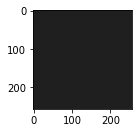

In [7]:
#Visualize numpy array as images

plt.subplot(1,3,1); plt.imshow(dct_2d, cmap = 'gray')

Testing 2D iDCT

In [8]:
idct_2d = idct2d(dct_2d)
idct_2d

array([[156., 159., 158., ..., 151., 152., 152.],
       [160., 154., 157., ..., 154., 155., 153.],
       [156., 159., 158., ..., 151., 152., 152.],
       ...,
       [114., 132., 123., ..., 135., 137., 114.],
       [121., 126., 130., ..., 133., 130., 113.],
       [121., 126., 130., ..., 133., 130., 113.]])

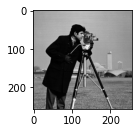

In [9]:
#Visualize numpy array as images

plt.subplot(1,3,1); plt.imshow(idct_2d, cmap = 'gray')

Testing 2D FFT

In [10]:
fft_2d = fft2d(I)
fft_2d

array([[7780728.              +0.j        ,
         479869.37901948+1167475.72134067j,
         382091.16744448 -344064.3500564j , ...,
          32037.18287967 +279751.14729755j,
         382091.16744448 +344064.3500564j ,
         479869.37901948-1167475.72134067j],
       [ 694675.1054863  -836574.80114987j,
        -591204.33605153 -768229.11424111j,
        -291668.0430127  +569278.93924113j, ...,
         -83875.04131211 -137195.71995934j,
         122819.1267773  +232945.05055378j,
        -228754.75396057 +214106.94106031j],
       [ 190981.79570956 -495893.92934818j,
        -222355.01079183 +225322.31088183j,
          80847.82930646 +124223.23457101j, ...,
        -104458.91757817 +128879.70980572j,
         -51622.00056568  +80830.52066902j,
         181561.79918424 +101211.91328498j],
       ...,
       [-167211.67596147  +95181.17949364j,
        -104680.94479169  -53130.37855467j,
          55467.66444863 +132785.8778589j , ...,
        -104641.85817434 +128394.5836996j

Testing 2D iFFT

In [11]:
ifft_2d = ifft2d(fft_2d)
ifft_2d

/var/folders/_3/fczvchrn6cd2yn547sk6xs700000gn/T/ipykernel_38635/3326263505.py:120: ComplexWarning: Casting complex values to real discards the imaginary part
  B[:,m] = ifft1d(A[:,m]) #do 1D iFFT on the column of A and plop into B


array([[156., 159., 158., ..., 151., 152., 152.],
       [160., 154., 157., ..., 154., 155., 153.],
       [156., 159., 158., ..., 151., 152., 152.],
       ...,
       [114., 132., 123., ..., 135., 137., 114.],
       [121., 126., 130., ..., 133., 130., 113.],
       [121., 126., 130., ..., 133., 130., 113.]])

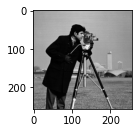

In [12]:
#Visualize numpy array as images

plt.subplot(1,3,1); plt.imshow(ifft_2d, cmap = 'gray')